## TAREA 5 ANÁLISIS TITANIC

### Método a usar Regresión Lineal

### Julio César Ramos Guevara

In [6]:
# Importamos bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Cargamos los datos

In [98]:
# Cargamos el dataset y mostramos las 5 primeras lineas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Verificacmos la estructura del dataset

In [100]:
# Vemos la medida del array cargado 
data.shape

(891, 12)

In [102]:
# Vemos resumen estadistico
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# Validamos valores nulos
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
# Convertimos los datos en un DataFrame
df = pd.DataFrame(data)

### Limpiamos los datos

In [108]:
# Para la columna Age vamos a imputar la edad con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\juces\AppData\Local\Temp\ipykernel_9860\420104270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [110]:
# Para las columnas Cabin y Enbarked podemos eliminar los nulos ya que no son relevantes para el análisis
df.drop(columns=['Cabin','Embarked'], inplace=True)

In [112]:
# Validamos nuevamente valores nulos
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [114]:
# Eliminamos duplicados si los hay
df.drop_duplicates(inplace=True)

### Realizamos un análisis exploratorio EDA

### Distribución de variables numéricas

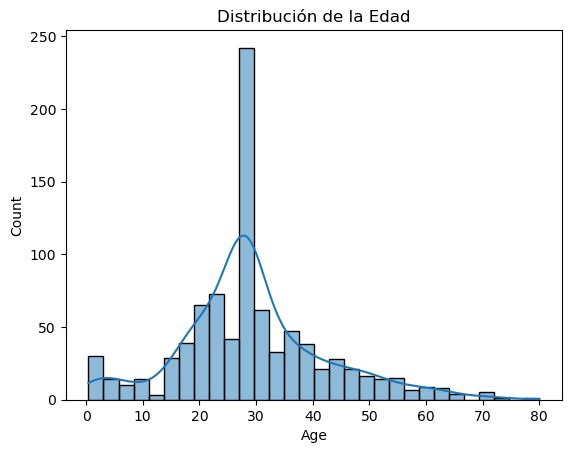

In [116]:
# Distribución de la variable 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

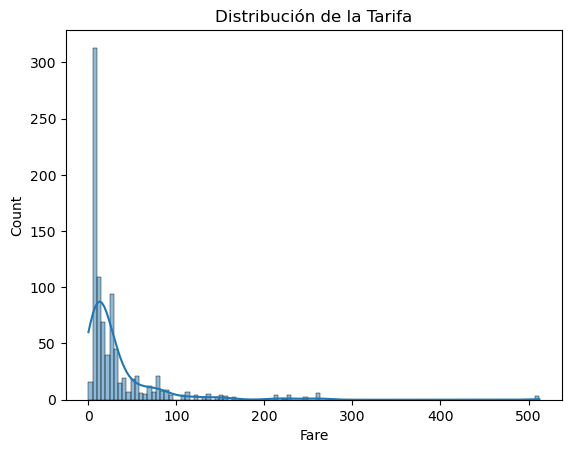

In [118]:
# Distribución de la variable 'Fare'
sns.histplot(df['Fare'], kde=True)
plt.title('Distribución de la Tarifa')
plt.show()

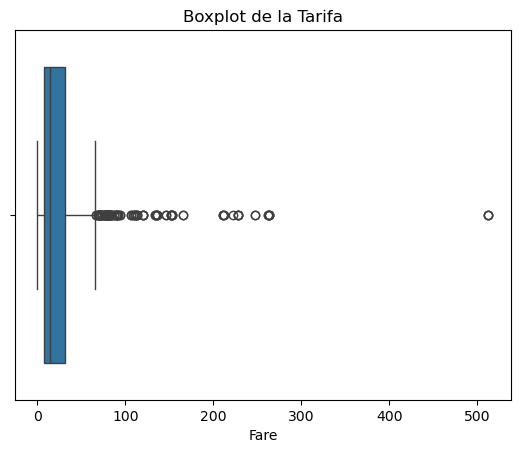

In [120]:
# Boxplot de 'Fare'
sns.boxplot(x=df['Fare'])
plt.title('Boxplot de la Tarifa')
plt.show()

### Distribución de variables categóricas

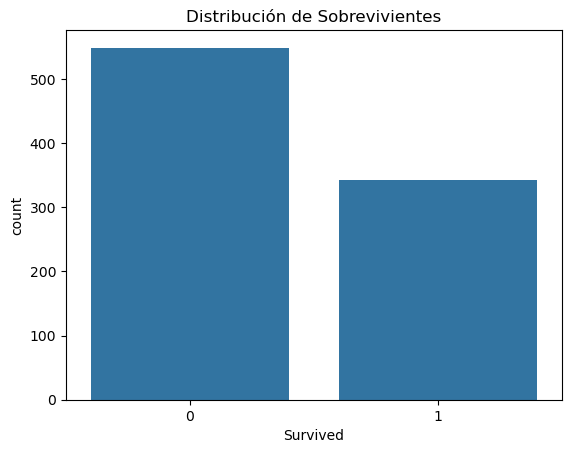

In [122]:
# Distribución de 'Survived'
sns.countplot(data=df, x='Survived')
plt.title('Distribución de Sobrevivientes')
plt.show()

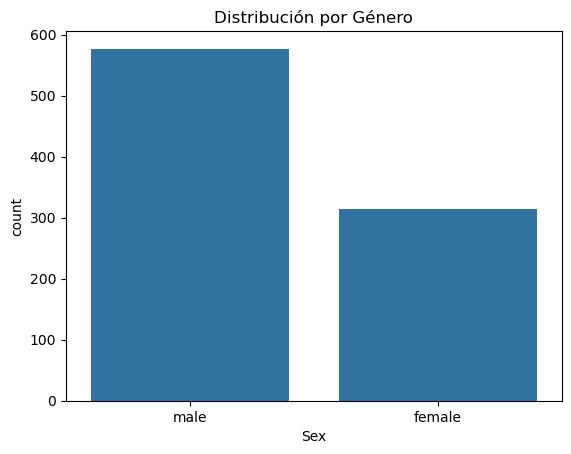

In [124]:
# Distribución de 'Sex'
sns.countplot(data=df, x='Sex')
plt.title('Distribución por Género')
plt.show()

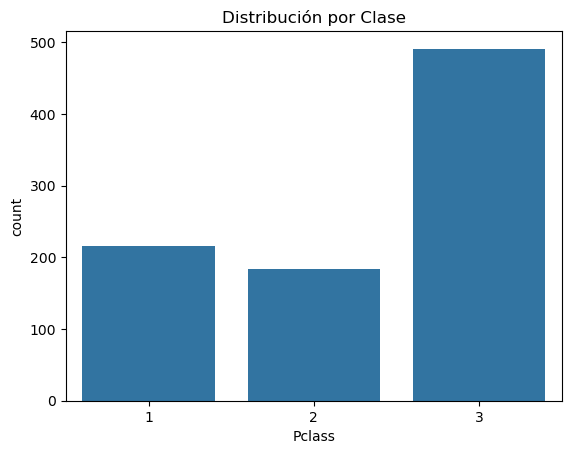

In [126]:
# Distribución de 'Pclass'
sns.countplot(data=df, x='Pclass')
plt.title('Distribución por Clase')
plt.show()

### Validamos relaciones entre variables

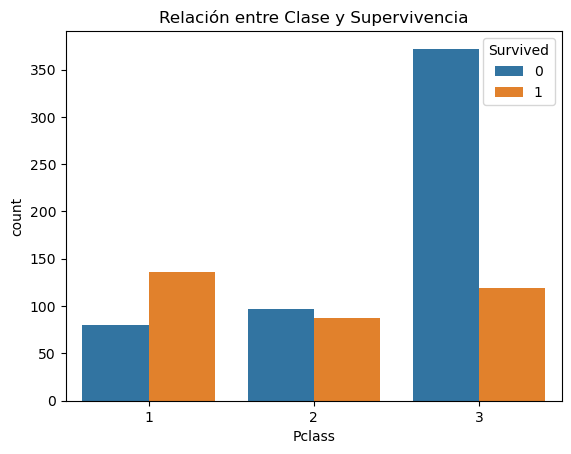

In [128]:
# Relación entre la clase y la supervivencia
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Relación entre Clase y Supervivencia')
plt.show()

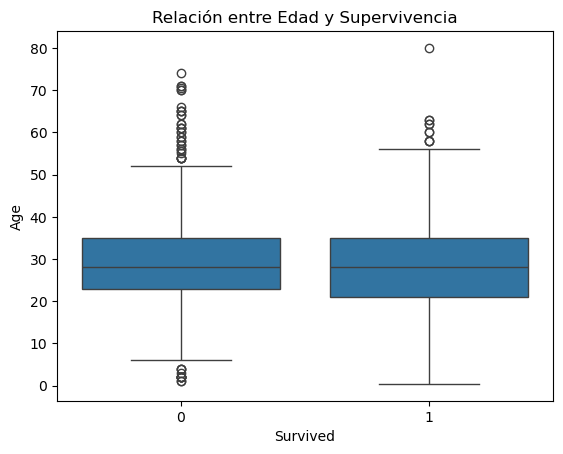

In [130]:
# Relación entre edad y supervivencia
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Relación entre Edad y Supervivencia')
plt.show()

In [132]:
# Verificamos las columnas de tipo numérico
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(f'Columnas numéricas: {numerical_columns}')

Columnas numéricas: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [134]:
# Excluir las columnas de texto (como 'name', 'ticket', etc.) para trabajar solo con las columnas numéricas
X = df[numerical_columns]

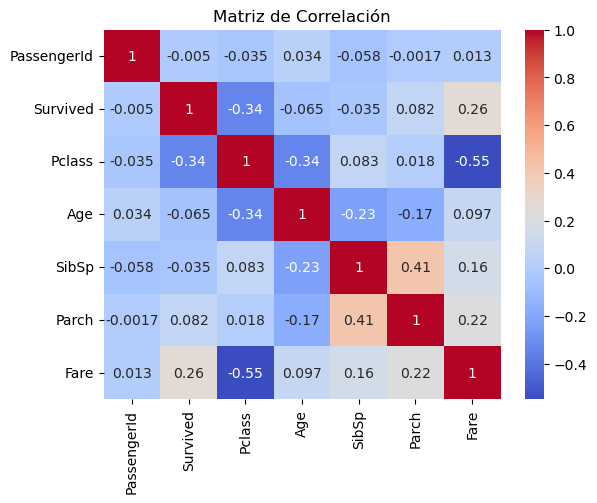

In [136]:
# Correlación entre variables numéricas
corr = X.corr()

# Visualización de la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Preparamos los datos

In [138]:
# Vamos a elegir 'Survived' como nuestra variable objetivo (y) y el resto son características (X)
X = df[['Pclass', 'Age', 'SibSp', 'Parch']]  # Ejemplo de características
y = df['Survived']  # Variable objetivo

In [140]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Aplicamos un modelo de regresión lineal con regularización (Ridge y Lasso)

In [142]:
# Importamos libreria
from sklearn.linear_model import Ridge, Lasso

# Definimos los hiperparámetros para Ridge y Lasso
alpha_ridge = 1.0  # Parámetro de regularización para Ridge
alpha_lasso = 0.1  # Parámetro de regularización para Lasso

# Creamos los modelos
ridge_model = Ridge(alpha=alpha_ridge)
lasso_model = Lasso(alpha=alpha_lasso)

# Ajustamos los modelos con el conjunto de entrenamiento
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

### Escalamos las características 

In [144]:
# Importamos lobreria
from sklearn.preprocessing import StandardScaler

# Inicializamos el escalador
scaler = StandardScaler()

# Escalamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Escalamos los datos de prueba usando el mismo escalador (para evitar el 'data leakage')
X_test_scaled = scaler.transform(X_test)

# Ajustamos el modelo de regresión lineal estándar
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluamos el modelo de regresión lineal

In [146]:
# Realizamos predicciones con el modelo ajustado
y_pred = lin_reg.predict(X_test_scaled)

# Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculamos el R2 score
r2 = r2_score(y_test, y_pred)

# Imprimimos resultados
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.1873840074069621
R-squared (R2): 0.22728816199144497


### Evaluamos los modelos de Ridge y Lasso

In [148]:
# Predicciones con el modelo Ridge
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Imprimimos resultados
print(f'Ridge Mean Squared Error (MSE): {ridge_mse}')
print(f'Ridge R-squared (R2): {ridge_r2}')

# Predicciones con el modelo Lasso
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Imprimimos resultados
print(f'Lasso Mean Squared Error (MSE): {lasso_mse}')
print(f'Lasso R-squared (R2): {lasso_r2}')

Ridge Mean Squared Error (MSE): 0.6925509819142581
Ridge R-squared (R2): -1.8558592035411512
Lasso Mean Squared Error (MSE): 0.2500854829551669
Lasso R-squared (R2): -0.031272710343179355


C:\Users\juces\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\juces\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### Visualizamos los resultados

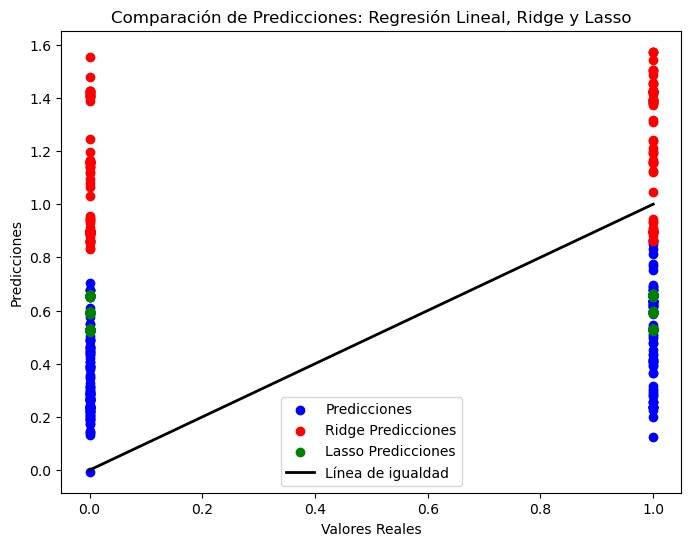

In [150]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.scatter(y_test, ridge_pred, color='red', label='Ridge Predicciones')
plt.scatter(y_test, lasso_pred, color='green', label='Lasso Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', lw=2, label='Línea de igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.title('Comparación de Predicciones: Regresión Lineal, Ridge y Lasso')
plt.show()